In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
img=cv2.imread('1.jpg')

In [25]:
cv2.startWindowThread()
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

In [3]:

def cv_show(name,img):
    cv2.startWindowThread()
    cv2.imshow(name,img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    cv2.waitKey(1)

In [23]:
#图像阈值处理
def cv_gray(img,index):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret,thresh1=cv2.threshold(gray,127,255,cv2.THRESH_BINARY)
    ret,thresh2=cv2.threshold(gray,127,255,cv2.THRESH_BINARY_INV)
    ret,thresh3=cv2.threshold(gray,127,255,cv2.THRESH_TRUNC)
    ret,thresh4=cv2.threshold(gray,127,255,cv2.THRESH_TOZERO)
    ret,thresh5=cv2.threshold(gray,127,255,cv2.THRESH_TOZERO_INV)
    titles=['Original Image','THRESH_BINARY','THRESH_BINARY_INV','THRESH_TRUNC','THRESH_TOZERO','THRESH_TOZERO_INV']
    images=[img,thresh1,thresh2,thresh3,thresh4,thresh5]
    if(index==1):
        cv_show(titles[index],thresh1)
    if(index==2):
        cv_show(titles[index],thresh2)
    if(index==3):
        cv_show(titles[index],thresh3)
    if(index==4):
        cv_show(titles[index],thresh4)
    if(index==5):
        cv_show(titles[index],thresh5)
    if(index==6):
        for i in range(6):
            plt.subplot(2,3,i+1)
            if(i==0):
                plt.imshow(images[i])
            else:
                plt.imshow(images[i],'gray')
            plt.title(titles[i])
            plt.xticks([]),plt.yticks([])
        plt.show

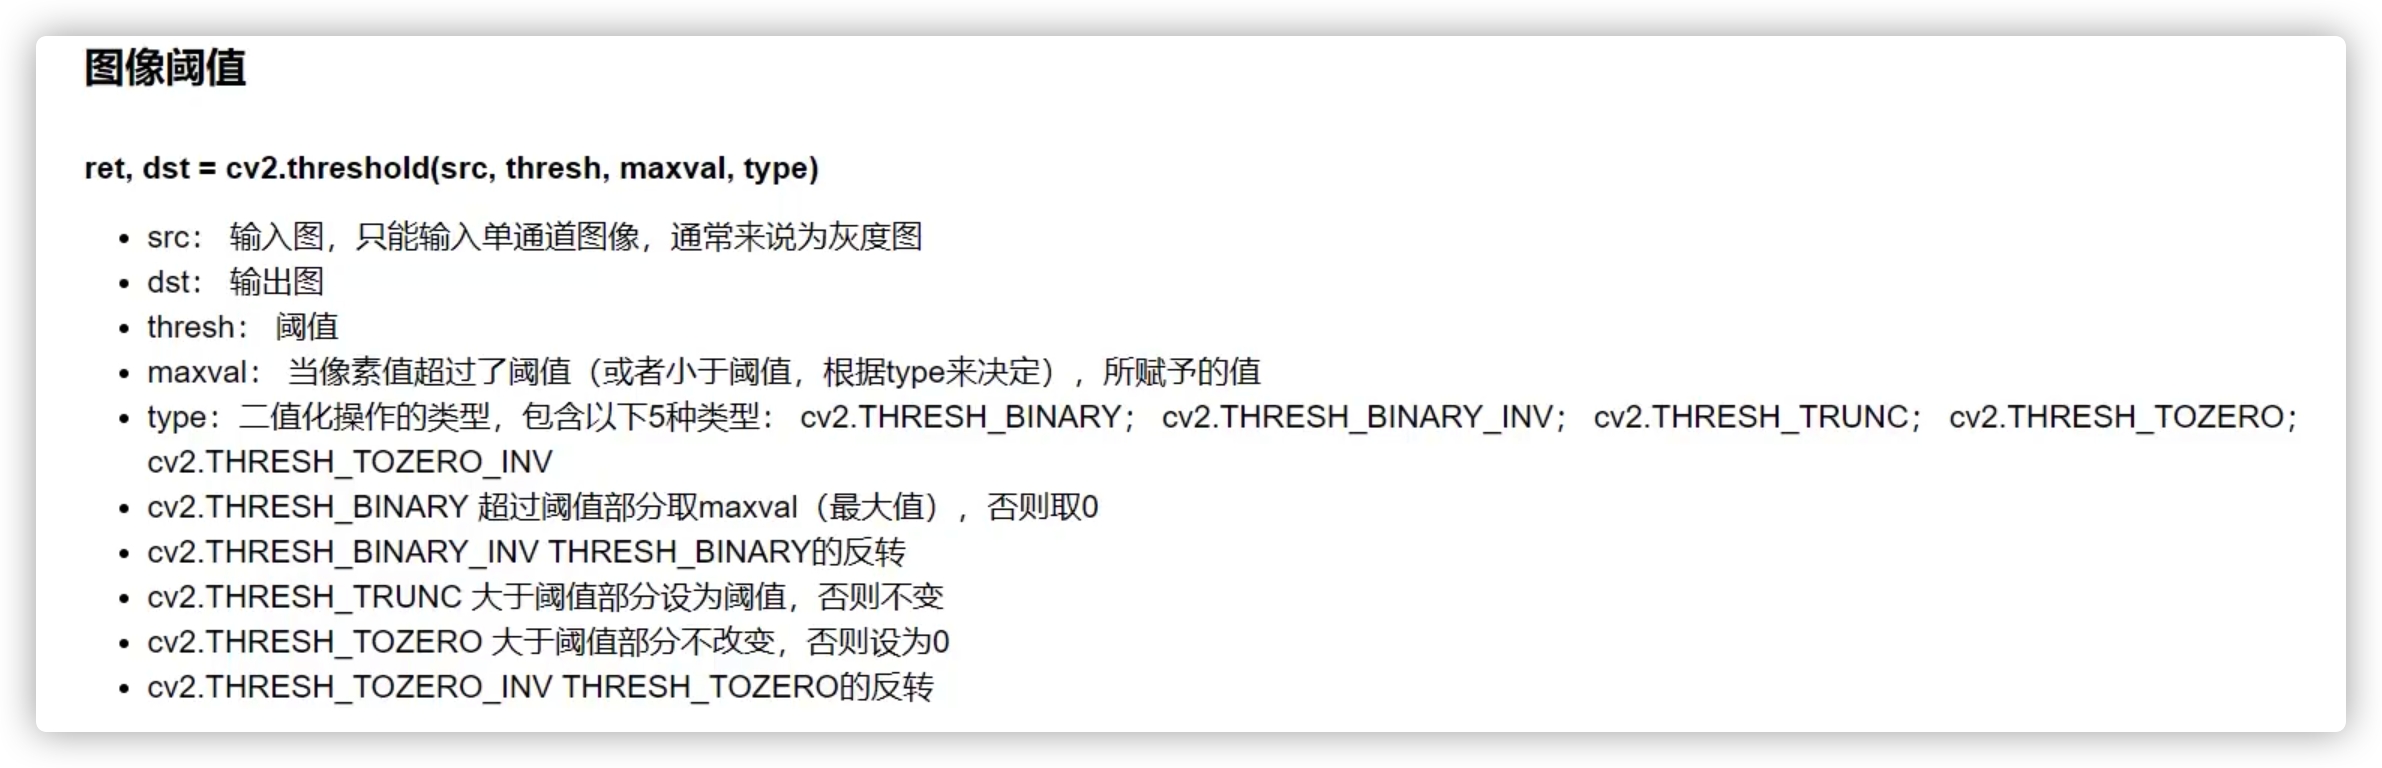

In [6]:
img=cv2.imread('1.jpg',cv2.IMREAD_GRAYSCALE)
img

array([[249, 249, 249, ..., 236, 236, 236],
       [249, 249, 249, ..., 236, 236, 236],
       [248, 249, 249, ..., 236, 236, 236],
       ...,
       [254, 254, 253, ..., 163, 163, 162],
       [253, 253, 253, ..., 162, 163, 162],
       [254, 254, 253, ..., 162, 162, 161]], dtype=uint8)

In [7]:
vc=cv2.VideoCapture('22.mp4')

In [8]:
if vc.isOpened():
    open,frame=vc.read()
else:
    open=False

In [9]:
while open:
    ret,frame=vc.read()
    if frame is None:
        break
    if ret == True:
        gray=cv2. cvtColor(frame,cv2.COLOR_BGR2GRAY)
        cv2.imshow('result',gray)
        if cv2.waitKey(10) & 0xFF==27:
            break
vc.release()
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

In [ ]:
cv2.startWindowThread()
img= cv2.imread('1.jpg')
img2=img+10
b,g,r=cv2.split(img2)
cur_img=img2.copy()
cur_img[:,:,1]=0
cur_img[:,:,2]=0
cv2.imshow('B',cur_img)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

In [9]:
img1=cv2.imread('2.jpg')
img_re=cv2.resize(img1,(452,444))
img_re+img
cv_show('result',img_re+img)

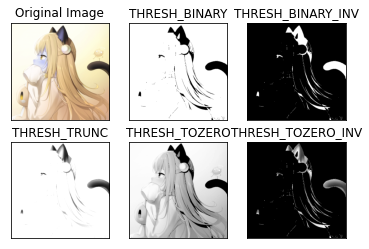

In [24]:
cv_gray(img,6)

In [16]:
img_noise=cv2.imread('5.jpg')
blur=cv2.blur(img_noise,(5,5))
# cv_show('noise',img_noise)
# cv_show('blur',blur)

In [18]:
#高斯滤波
'''思想：对数值作加权平均，该值作为变化后的核的色素值，权值与离核的距离有关，满足高斯分布
比如[[0.6,0.8,0.6][0.8,1,0.8][0.6,0.8,0.6]]
'''
aussian=cv2.GaussianBlur(img_noise,(5,5),1)
cv_show('aussian',aussian)

In [19]:
#中值滤波
#用中值代替
median=cv2.medianBlur(img_noise,5)
cv_show('median',median)

In [23]:
res=np.hstack((blur,aussian,median))
cv_show('res',res)

In [53]:
#腐蚀
img6=cv2.imread('6.jpg')
kernel=np.ones((3,3),np.uint8)
erosion=cv2.erode(img,kernel,iterations=1)
cv_show('erosion',erosion)

In [54]:
#膨胀操作
kernel1=np.ones((3,3),np.uint8)
dilate=cv2.dilate(img,kernel1,iterations=1)
cv_show('dilate',dilate)


In [ ]:
#开运算：先腐蚀，后膨胀
#opening=cv2.morphologyEx(img,cv2.MORPH_OPEN,kernel)
#闭运算：先膨胀，后腐蚀
#closing=cv2.morphologyEx(img,cv2.MORPH_CLOSE,kernel)

In [51]:
#梯度运算
#膨胀-腐蚀
gradient=cv2.morphologyEx(img,cv2.MORPH_GRADIENT,kernel)
cv_show('gradient',gradient)

In [55]:
cv_show('1',dilate-erosion)

In [57]:
#礼帽：原始输入-开运算结果
#黑帽：闭运算-原始输入
tophat=cv2.morphologyEx(img,cv2.MORPH_TOPHAT,kernel)
cv_show('tophat',tophat)
blackhat=cv2.morphologyEx(img,cv2.MORPH_BLACKHAT,kernel)
cv_show('blackhat',blackhat)

In [4]:
#图像梯度-Sobel算子
'''Gx=[[-1,0,1],[-2,0,2],[-1,0,1]]*A Gy=[[-1,-2,-1],[0,0,0],[1,2,2]]*A
'''
gray=cv2.imread('1.jpg',cv2.IMREAD_GRAYSCALE)
sobelx=cv2.Sobel(gray,cv2.CV_64F,1,0,ksize=3)
sobely=cv2.Sobel(gray,cv2.CV_64F,0,1,ksize=3)
sobelxy=cv2.addWeighted(sobelx,0.5,sobely,0.5,0)
result=np.hstack((sobelx,sobely,sobelxy))
cv_show('result',result)

In [125]:
#Scharr算子 laplacian算子
'''Gx=[[-3,0,3][-10,0,10],[3,0,3]]*A G=[[0,1,0],[1,-4,1],[0,1,0]]*A
'''
gray=cv2.imread('1.jpg',cv2.IMREAD_GRAYSCALE)
sobelx=cv2.Sobel(gray,cv2.CV_64F,1,0,ksize=3)
sobely=cv2.Sobel(gray,cv2.CV_64F,0,1,ksize=3)
sobelx=cv2.convertScaleAbs(sobelx)
sobely=cv2.convertScaleAbs(sobely)
sobelxy=cv2.addWeighted(sobelx,0.5,sobely,0.5,0)
scharrx=cv2.Scharr(gray,cv2.CV_64F,1,0)
scharry=cv2.Scharr(gray,cv2.CV_64F,0,1)
scharrx=cv2.convertScaleAbs(scharrx)
scharry=cv2.convertScaleAbs(scharry)
scharrxy=cv2.addWeighted(scharrx,0.5,scharry,0.5,0)
laplacian=cv2.Laplacian(gray,cv2.CV_64F)
laplacian=cv2.convertScaleAbs(laplacian)
res=np.hstack((sobelxy,scharrxy,laplacian))
cv_show('res',res)

In [4]:
'''
Canny边缘检测
1）使用高斯滤波，平滑图像
2）计算图像中每个像素点的梯度强度和方向
3）应用非极大值（Non-Maximum Suppression）
4）应用双阈值检测来确定真实和潜在的边缘
5）通过抑制孤立的弱边缘来完成最终的检测
'''
'''
非极大值抑制
线性插值法：其实就是找两个像素点之间的亚像素点
或者把一个像素的梯度方向离散为八个方向，只需计算前后即可，不用插值
'''
'''
双阈值检测：
梯度值>maxVal:处理为边界 minVal<梯度值<maxVal:连有边界则保留，否则舍弃
梯度值<minVal:舍弃
'''

'\n双阈值检测：\n梯度值>maxVal:处理为边界 minVal<梯度值<maxVal:连有边界则保留，否则舍弃\n梯度值<minVal:舍弃\n'

In [7]:
v1=cv2.Canny(gray,80,150)
v2=cv2.Canny(gray,50,100)
res1=np.hstack((v1,v2))
cv_show('res1',res1)

In [121]:
aussian=cv2.GaussianBlur(gray,(3,3),1)
w,h=gray.shape
NMS=np.copy(aussian)
cv_show('1',NMS)
dx=np.zeros([w,h])
dy=np.zeros([w,h])
d=np.zeros([w,h])
angel=np.zeros([w,h])
for i in range(1,w-1):
    for j in range(1,h-1):
        if(aussian[i,j]==0):
            NMS[i,j]=0
        else:          
            dx[i,j]=-aussian[i-1,j-1]-2*aussian[i,j-1]-aussian[i+1,j-1]+aussian[i-1,j+1]+2*aussian[i,j+1]+aussian[i+1,j+1]
            dy[i,j]=aussian[i-1,j-1]+2*aussian[i-1,j]+aussian[i-1,j+1]-aussian[i+1,j-1]-2*aussian[i+1,j]-aussian[i+1,j+1]
            d[i,j]=(dx[i,j]**2+dy[i,j]**2)**0.5
            if(dx[i,j]==0):
                NMS[i,j]=0
            else:
                angel[i,j]=dy[i,j]/dx[i,j]
                if(0<angel[i,j]<1):
                    Gp1=(1-angel[i,j])*(d[i,j+1])+angel[i,j]*d[i-1,j+1]
                    GP2=(1-angel[i,j])*(d[i,j-1])+angel[i,j]*d[i+1,j-1]
                if(angel[i,j]>=1):
                    Gp1=(1-angel[i,j])*(d[i-1,j+1])+angel[i,j]*d[i-1,j]
                    GP2=(1-angel[i,j])*(d[i+1,j-1])+angel[i,j]*d[i+1,j]
                if(angel[i,j]<=-1):
                    Gp1=(1-angel[i,j])*(d[i-1,j])+angel[i,j]*d[i-1,j-1]
                    GP2=(1-angel[i,j])*(d[i+1,j])+angel[i,j]*d[i+1,j+1]
                if((-1<angel[i,j]<=0)):
                    Gp1=(1-angel[i,j])*(d[i-1,j-1])+angel[i,j]*d[i,j-1]
                    GP2=(1-angel[i,j])*(d[i+1,j+1])+angel[i,j]*d[i,j+1]
                
                if(NMS[i,j]<Gp1 or NMS[i,j]<GP2):
                    NMS[i,j]=0
                
cv_show('NMS',NMS)
def doubletrunc(NMS,trunc1,trunc2):
    w,h=NMS.shape
    for i in range(1,w-1):
        for j in range(1,h-1):
            if(NMS[i,j]>trunc2):
                NMS[i,j]=255
            elif(trunc1<NMS[i,j]<=trunc2):
                if(NMS[i-1,j-1]==255 or NMS[i-1,j]==255 or NMS[i-1,j+1]==255 or NMS[i,j-1]==255 or NMS[i,j+1]==255 or NMS[i+1,j-1]==255 or NMS[i+1,j]==255 or NMS[i+1,j+1] ==255):
                    NMS[i,j]=255
                else:
                    NMS[i,j]=0
            else:
                NMS[i,j]=0
    return NMS
mycanny=doubletrunc(NMS,120,160)
print(mycanny)
res2=np.hstack((res1,mycanny))
cv_show('Canny My_Canny',res2)

[[249 249 249 ... 236 236 236]
 [249 255 255 ... 255 255 236]
 [249 255   0 ...   0   0 236]
 ...
 [254 255 255 ...   0   0 163]
 [254 255 255 ...   0   0 162]
 [253 253 253 ... 162 162 162]]


In [38]:
#高斯金字塔：向下取样
up=cv2.pyrUp(img)
cv_show('up',up)
down=cv2.pyrDown(img)
cv_show('down',down)

#拉普拉斯金字塔
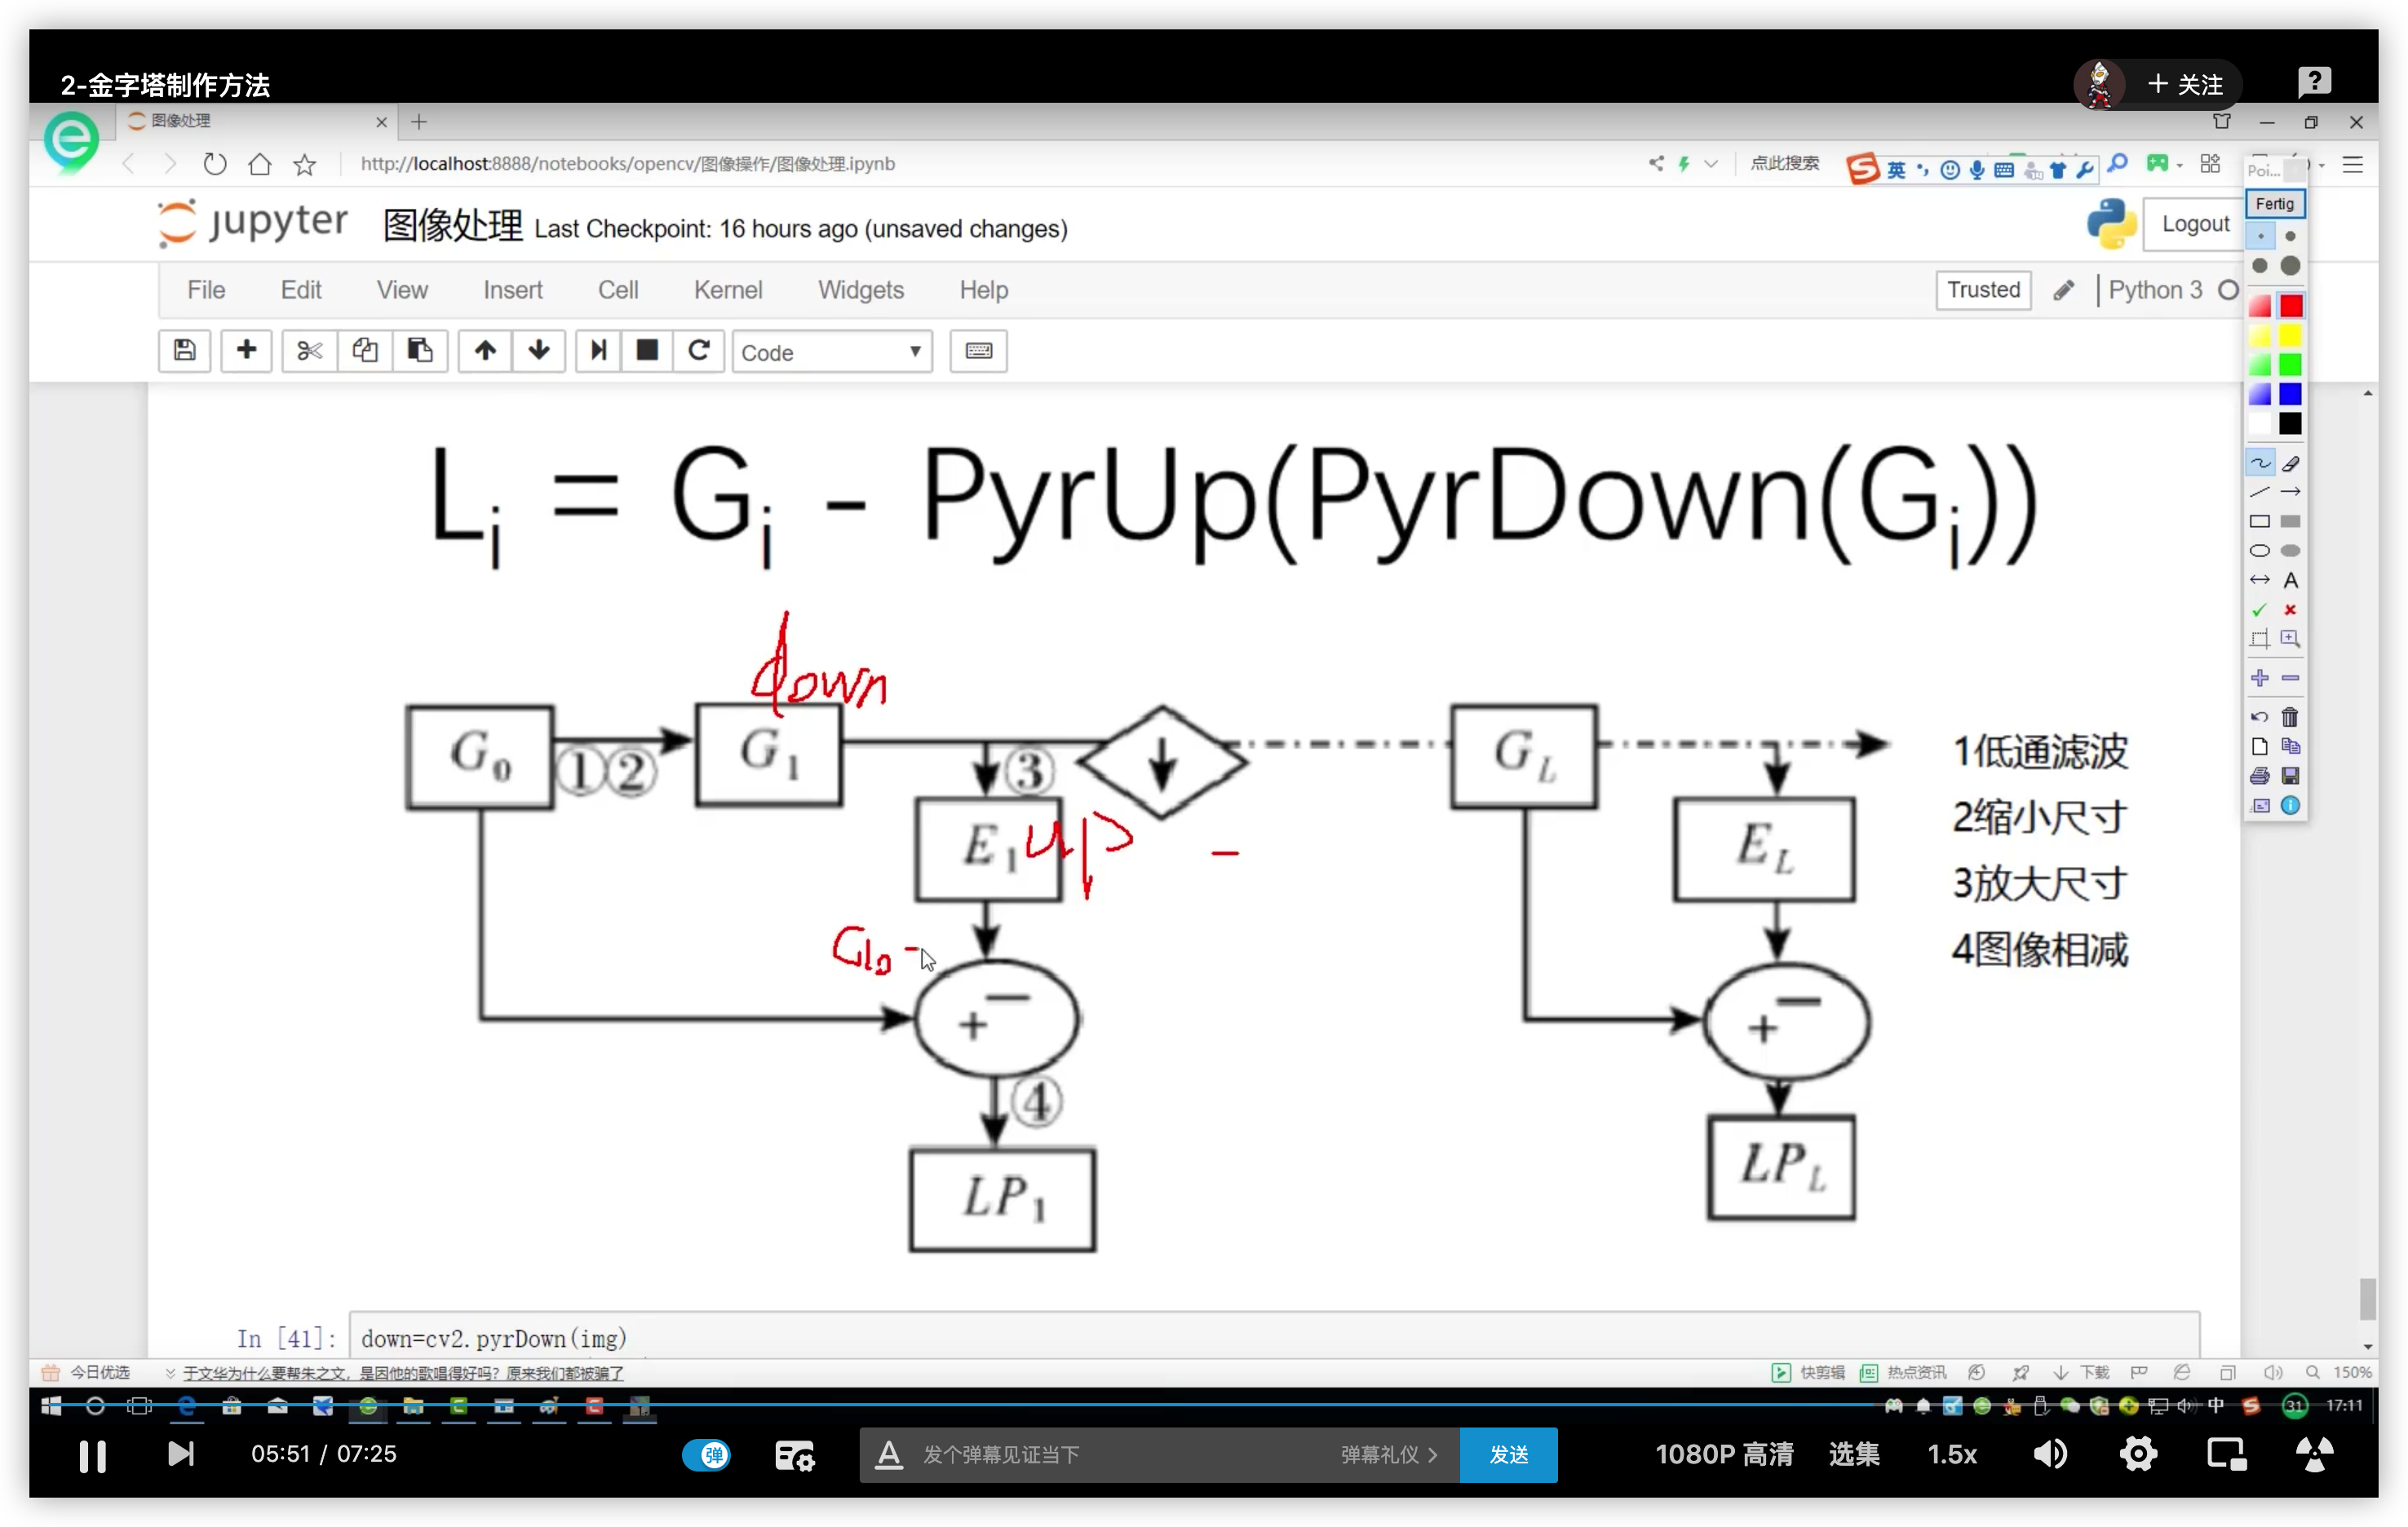

In [39]:
up_down=cv2.pyrDown(up)
cv_show('img-up_down',img-up_down)

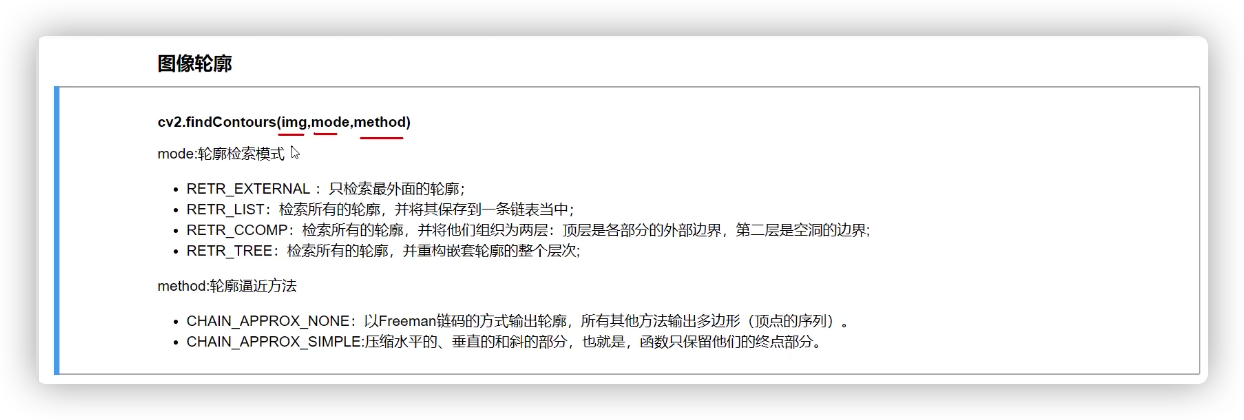

In [57]:
#为了更高的准确率，使用二值图像
ret,thresh=cv2.threshold(gray,127,255,cv2.THRESH_BINARY)
cv_show('thresh',thresh)
contours,hierachy=cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
draw_gray=gray.copy()
res3=cv2.drawContours(draw_gray,contours,-1,(0,0,255),2)
#轮廓近似
cnt=contours[0]
draw_img=img.copy()
res=cv2.drawContours(draw_img,[cnt],-1,(0,0,255),2)
epsilon=0.01*cv2.arcLength(cnt,True)
approx=cv2.approxPolyDP(cnt,epsilon,True)
draw_img=img.copy()
res=cv2.drawContours(draw_img,[approx],-1,(0,0,255),2)
cv_show('approx',res)

In [51]:
cnt=contours[0]
cv2.contourArea(cnt)

195716.0

模版匹配
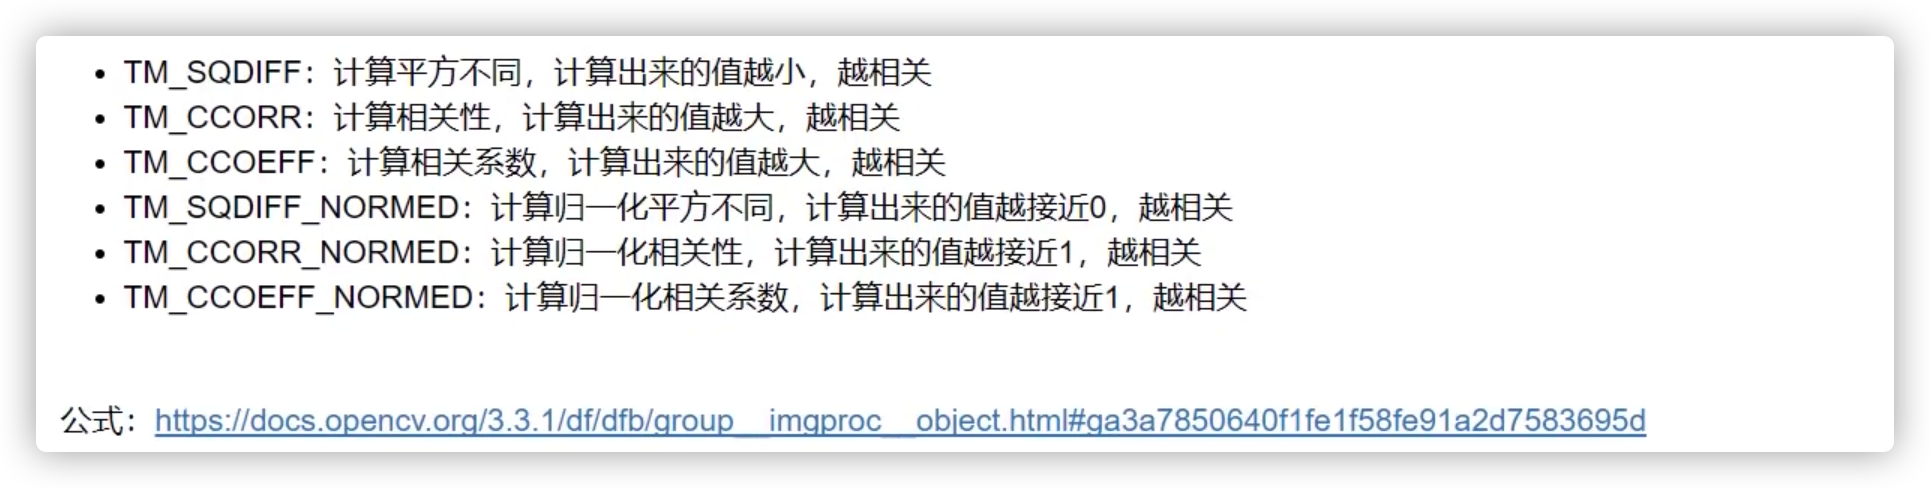

In [88]:
face=cv2.imread('face.jpg')
h,w=face.shape[:2]
print(h,w)
print(img.shape)

226 180
(444, 452, 3)


(100, 0) (280, 226)


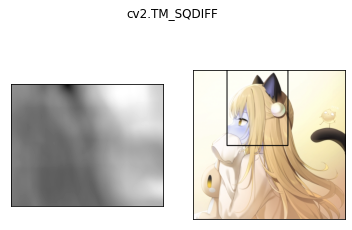

(0, 0) (180, 226)


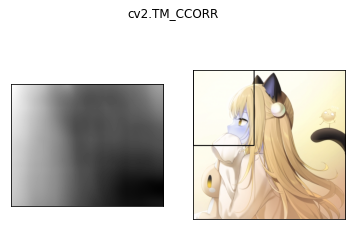

(100, 0) (280, 226)


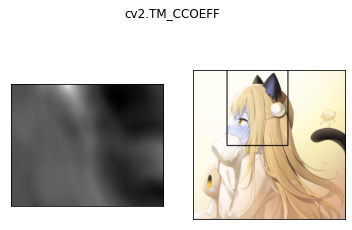

(100, 0) (280, 226)


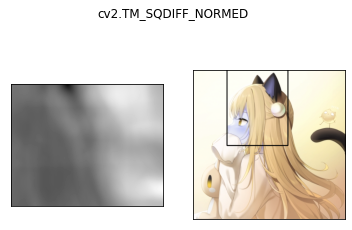

(100, 0) (280, 226)


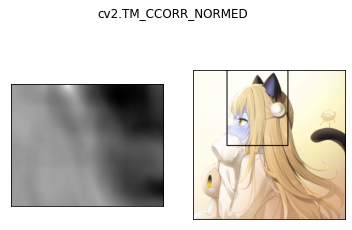

(100, 0) (280, 226)


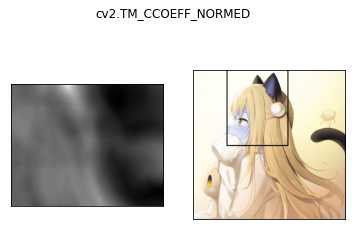

In [89]:
methods=["cv2.TM_SQDIFF","cv2.TM_CCORR" ,"cv2.TM_CCOEFF","cv2.TM_SQDIFF_NORMED","cv2.TM_CCORR_NORMED","cv2.TM_CCOEFF_NORMED"]
for meth in methods:
    img2=img.copy()
    method=eval(meth)
    res=cv2.matchTemplate(img,face,method)
    min_val,max_val,min_loc,max_loc=cv2.minMaxLoc(res)
    if method in [cv2.TM_SQDIFF,cv2.TM_SQDIFF_NORMED]:
        top_left=min_loc
    else:
        top_left=max_loc
    bottom_right=(top_left[0]+w,top_left[1]+h)
    print(top_left,bottom_right)
    cv2.rectangle(img2,top_left,bottom_right,0,2)
    plt.subplot(121),plt.imshow(res,cmap='gray')
    plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img2,cmap='gray')
    plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()
    
    
    

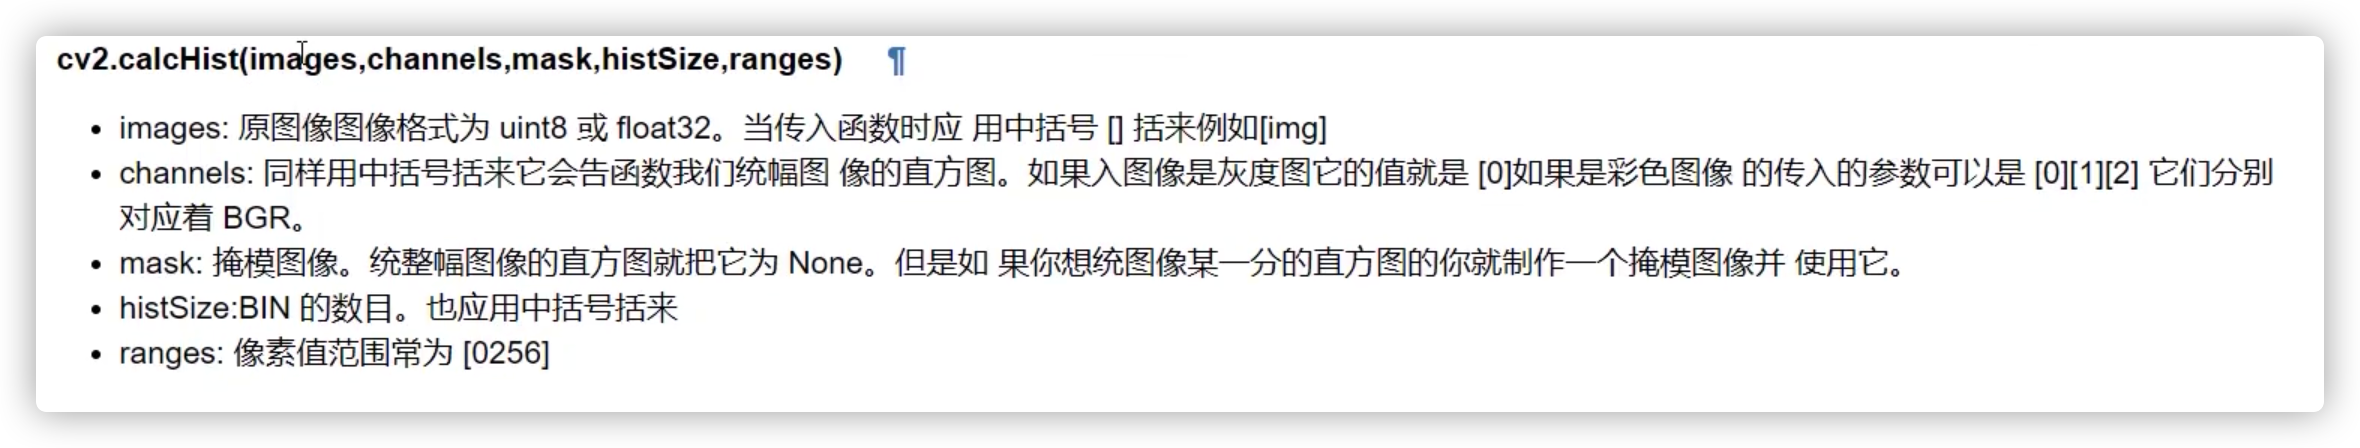

In [94]:
#直方图
hist=cv2.calcHist([gray],[0],None,[256],[0,256])
hist.shape

(256, 1)

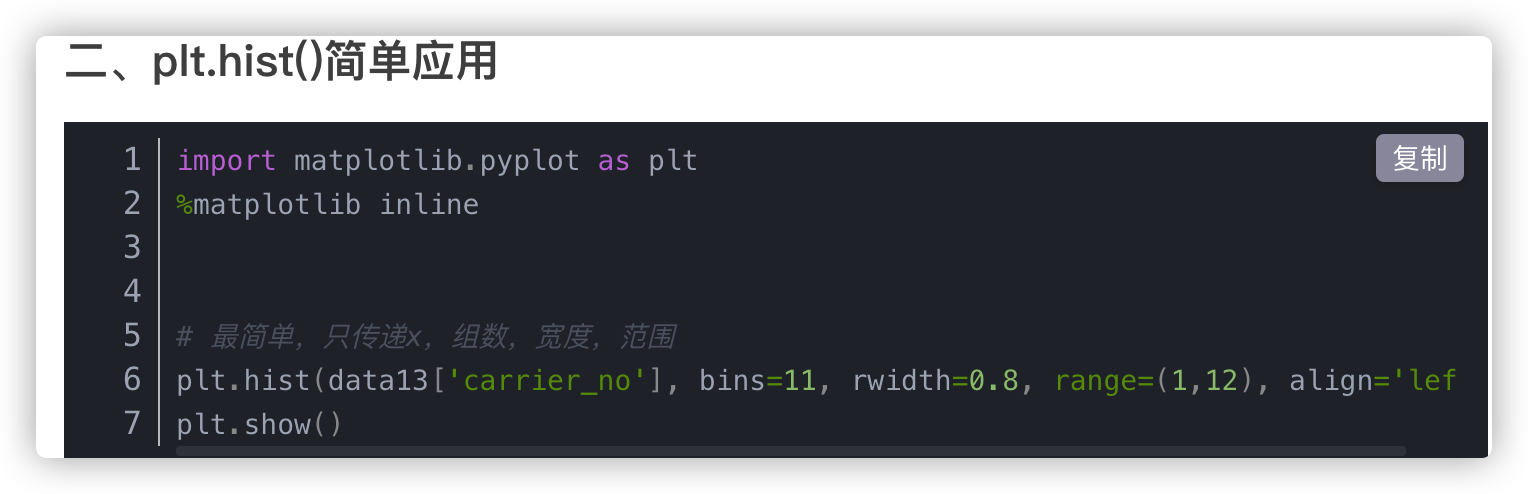

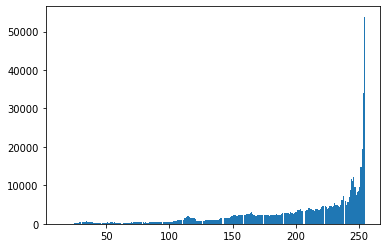

In [95]:
plt.hist(img.ravel(),256)
plt.show()

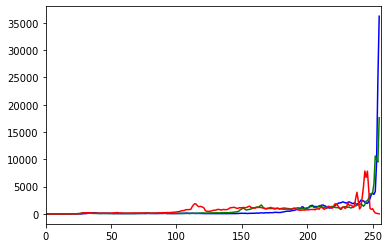

In [96]:
colors=['b','g','r']
for i,col in enumerate(colors):
    histr=cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color=col)
    plt.xlim([0,256])

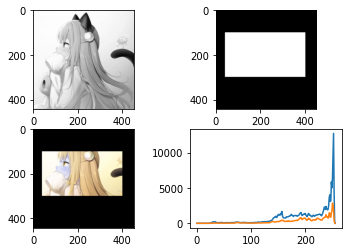

In [112]:
#mask操作
mask = np.zeros(img.shape[:2],np.uint8)
mask[100:300,40:400]=255
marked_img=cv2.bitwise_and(img,img,mask=mask)
hist_mask=cv2.calcHist([gray],[0],mask,[256],[0,256])
plt.subplot(221),plt.imshow(gray,'gray')
plt.subplot(222),plt.imshow(mask,'gray')
plt.subplot(223),plt.imshow(marked_img,'gray')
plt.subplot(224),plt.plot(hist),plt.plot(hist_mask)
plt.show()

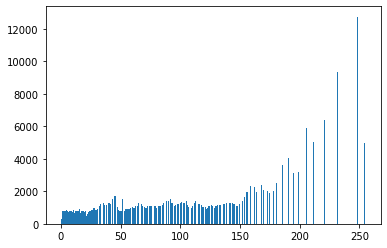

In [114]:
#均衡化
equ=cv2.equalizeHist(gray)
plt.hist(equ.ravel(),256)
plt.show()

In [120]:
#自适应直方图
clahe=cv2.createCLAHE(clipLimit=2.0,tileGridSize=(8,8))
res_cla=clahe.apply(gray)
res4=np.hstack((gray,equ,res_cla))
cv_show('equlize',res4)

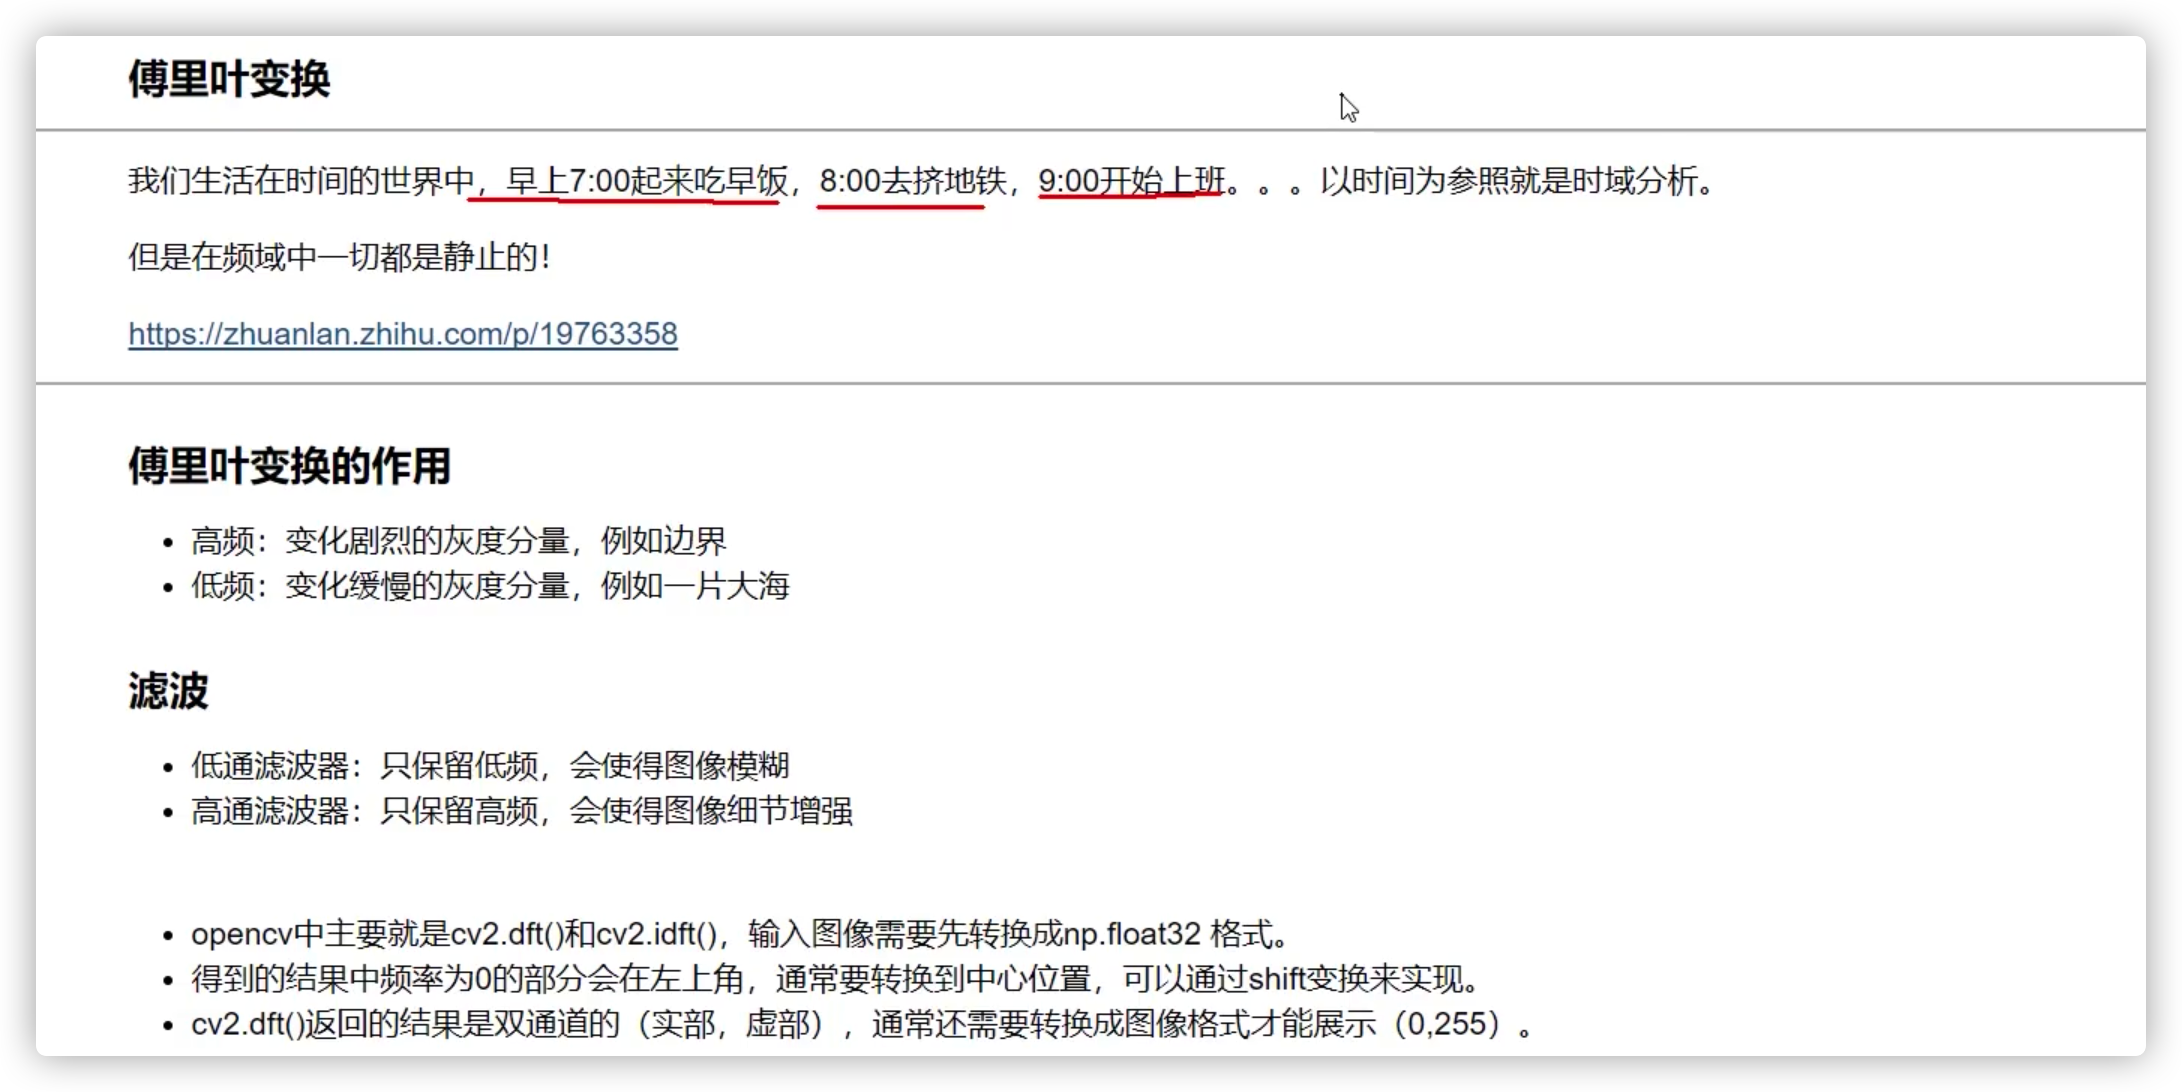

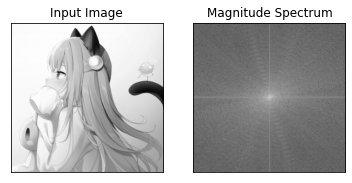

In [126]:
img_float32=np.float32(gray)
dft=cv2.dft(img_float32,flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift=np.fft.fftshift(dft)
magnitude_spectrum=20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
plt.subplot(121),plt.imshow(gray,'gray')
plt.title("Input Image"),plt.xticks([]),plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum,'gray')
plt.title("Magnitude Spectrum"),plt.xticks([]),plt.yticks([])
plt.show()

In [131]:
#低频滤波器
img_float32=np.float32(gray)
dft=cv2.dft(img_float32,flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift=np.fft.fftshift(dft)
magnitude_spectrum=20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
rows,cols=gray.shape
crows,ccols=int(rows/2),int(cols/2)
mask=np.zeros((rows,cols,2),np.uint8)
mask[crows-30:crows+30,ccols-30:ccols+30]=1
fshift=dft_shift*mask
ifshift=np.fft.ifftshift(fshift)
img_back=cv2.idft(ifshift)
img_back=cv2.magnitude(img_back[:,:,0],img_back[:,:,1])
# plt.subplot(121),plt.imshow(gray,'gray')
# plt.title("Input Image"),plt.xticks([]),plt.yticks([])
# plt.subplot(122),plt.imshow(img_back,'gray')
# plt.title("Result"),plt.xticks([]),plt.yticks([])
# plt.show()

In [134]:
#高频滤波器
img_float32=np.float32(gray)
dft=cv2.dft(img_float32,flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift=np.fft.fftshift(dft)
magnitude_spectrum=20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
rows,cols=gray.shape
crows,ccols=int(rows/2),int(cols/2)
mask=np.ones((rows,cols,2),np.uint8)
mask[crows-20:crows+20,ccols-20:ccols+20]=0
fshift=dft_shift*mask
ifshift=np.fft.ifftshift(fshift)
img_back=cv2.idft(ifshift)
img_back=cv2.magnitude(img_back[:,:,0],img_back[:,:,1])
# plt.subplot(121),plt.imshow(gray,'gray')
# plt.title("Input Image"),plt.xticks([]),plt.yticks([])
# plt.subplot(122),plt.imshow(img_back,'gray')
# plt.title("Result"),plt.xticks([]),plt.yticks([])
# plt.show()